In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:/Users/Jay Raikar/OneDrive/Desktop/Data Analytics/Health Care Analysis/synthetic_health_lifestyle_dataset.csv")

In [3]:
df.head(10)

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1
5,6,25,Female,167.7,62.0,22.0,No,Daily,Good,Moderate,No,1,5.8
6,7,38,Other,152.5,88.0,37.8,No,1-2 times/week,Good,High,Yes,2,5.8
7,8,56,Male,165.3,65.0,23.8,No,Daily,Good,Moderate,No,7,6.8
8,9,36,Male,176.9,41.3,13.2,No,Daily,Average,NaN,No,6,6.3
9,10,40,Other,162.0,77.4,29.5,Yes,1-2 times/week,Good,Low,Yes,1,5.6


In [4]:
df.tail(10)

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
7490,7491,24,Other,153.9,51.7,21.8,No,1-2 times/week,Excellent,High,No,7,9.7
7491,7492,44,Male,155.1,81.5,33.9,Yes,3-5 times/week,Excellent,Low,No,7,7.5
7492,7493,18,Female,175.6,59.7,19.4,No,3-5 times/week,Good,Moderate,No,10,7.8
7493,7494,44,Other,152.7,73.6,31.6,No,3-5 times/week,Excellent,Low,No,6,5.4
7494,7495,33,Female,163.8,78.1,29.1,Yes,NaN,Good,NaN,No,10,6.1
7495,7496,55,Other,168.3,52.4,18.5,Yes,1-2 times/week,Average,Moderate,Yes,4,5.5
7496,7497,24,Male,179.1,58.8,18.3,No,3-5 times/week,Excellent,Moderate,No,5,7.6
7497,7498,61,Other,160.2,80.0,31.2,No,3-5 times/week,Poor,Moderate,No,5,6.2
7498,7499,40,Female,172.6,66.1,22.2,No,1-2 times/week,Good,Low,No,9,6.1
7499,7500,58,Other,163.8,59.3,22.1,No,Daily,Excellent,Low,No,6,8.1


In [5]:
print('Size of data:', df.shape)

Size of data: (7500, 13)


In [6]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Smoker',
       'Exercise_Freq', 'Diet_Quality', 'Alcohol_Consumption',
       'Chronic_Disease', 'Stress_Level', 'Sleep_Hours'],
      dtype='object')

In [7]:
df.dtypes

ID                       int64
Age                      int64
Gender                  object
Height_cm              float64
Weight_kg              float64
BMI                    float64
Smoker                  object
Exercise_Freq           object
Diet_Quality            object
Alcohol_Consumption     object
Chronic_Disease         object
Stress_Level             int64
Sleep_Hours            float64
dtype: object

### **KPIs Requirement**

In [8]:
#Average Age of Individuals

avg_age = df['Age'].mean()
print(f"Average Age: {avg_age:,.0f}")

Average Age: 44


In [9]:
#Gender Distribution

gender_distribution = df['Gender'].value_counts(normalize=True) * 100  
#value_counts, count unique values, normalize=True gives fraction.

gender_distribution = gender_distribution.round(2)
print(gender_distribution)

Gender
Male      34.01
Female    33.47
Other     32.52
Name: proportion, dtype: float64


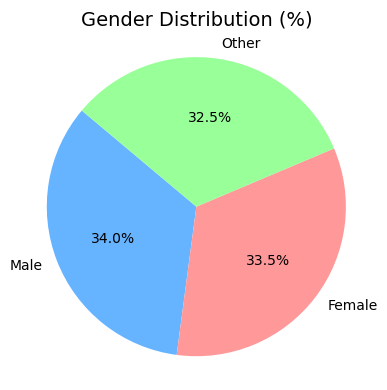

In [30]:
plt.figure(figsize=(4, 4))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999', '#99ff99'],
    startangle=140,
)

plt.title("Gender Distribution (%)", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [10]:
#Average BMI Distribution

avg_bmi = round(df["BMI"].mean(), 2)
print("Average BMI:", avg_bmi)

def categorize_bmi(bmi):
    if bmi < 15:
        return "Underweight"
    elif 15 <= bmi < 20:
        return "Normal"
    elif 20 <= bmi < 25:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(categorize_bmi)

bmi_distribution = df["BMI_Category"].value_counts(normalize=True) * 100
bmi_distribution = bmi_distribution.round(2)
print("BMI Category Distribution (%):\n", bmi_distribution)


Average BMI: 26.03
BMI Category Distribution (%):
 BMI_Category
Obese          54.05
Overweight     29.03
Normal         14.16
Underweight     2.76
Name: proportion, dtype: float64


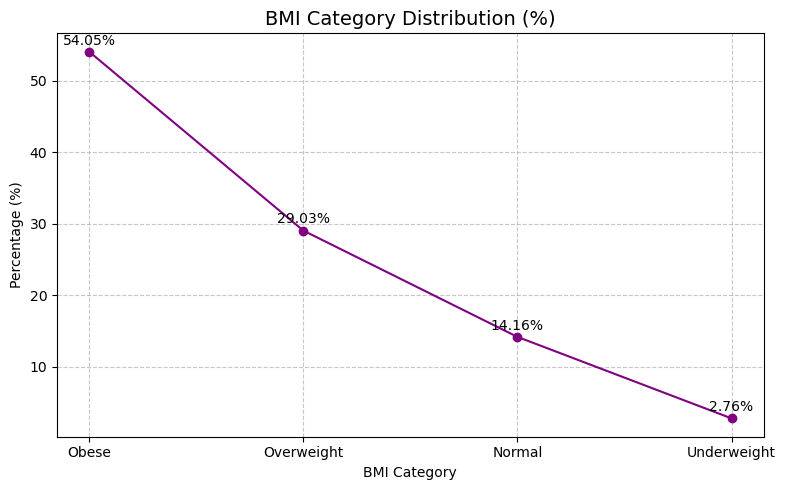

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(bmi_distribution.index, bmi_distribution.values, marker='o', linestyle='-', color='purple')

plt.title("BMI Category Distribution (%)", fontsize=14)
plt.xlabel("BMI Category")
plt.ylabel("Percentage (%)")
plt.grid(True, linestyle='--', alpha=0.7)

for i, value in enumerate(bmi_distribution.values):
    plt.text(i, value + 1, f"{value}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
#Chronic Disease Patient

chronic_distribution = df["Chronic_Disease"].value_counts(normalize=True) * 100
chronic_distribution = chronic_distribution.round(2).sort_values(ascending=True)
print(chronic_distribution)

Chronic_Disease
Yes    19.31
No     80.69
Name: proportion, dtype: float64


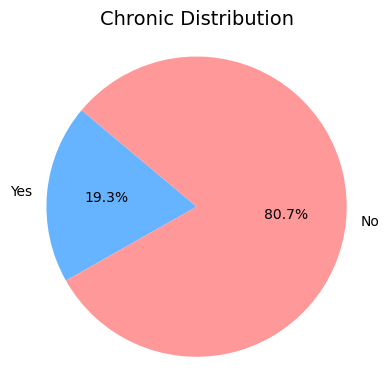

In [29]:
plt.figure(figsize=(4, 4))
plt.pie(
    chronic_distribution,
    labels=chronic_distribution.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999', '#99ff99'],
    startangle=140,
)

plt.title("Chronic Distribution", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [12]:
#Average Sleep Duration across different age and gender

bins = [0, 20, 40, 50, 60]
labels = ['15-30', '30-40', '40-50', '50-60']

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

avg_sleep = df.groupby(["Gender", "Age"])["Sleep_Hours"].mean().round(2).reset_index()
print(avg_sleep)

     Gender  Age  Sleep_Hours
0    Female   18         7.21
1    Female   19         6.98
2    Female   20         6.89
3    Female   21         6.98
4    Female   22         7.03
..      ...  ...          ...
151   Other   65         6.95
152   Other   66         6.83
153   Other   67         6.97
154   Other   68         6.78
155   Other   69         7.24

[156 rows x 3 columns]


In [13]:
#Average Stress Level by gender, age group, or smoker status.

bins = [0, 20, 40, 50, 60]
labels = ['15-30', '30-40', '40-50', '50-60']

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

avg_stress = df.groupby(["Gender", "Age", "Smoker"])["Stress_Level"].mean().round(2).reset_index()
print(avg_stress)

     Gender  Age Smoker  Stress_Level
0    Female   18     No          4.93
1    Female   18    Yes          5.78
2    Female   19     No          5.50
3    Female   19    Yes          7.00
4    Female   20     No          6.18
..      ...  ...    ...           ...
307   Other   67    Yes          6.30
308   Other   68     No          6.67
309   Other   68    Yes          5.71
310   Other   69     No          5.54
311   Other   69    Yes          6.06

[312 rows x 4 columns]


In [14]:
#Smoking Rate (% smokers vs. non-smokers)

smoking_rate = df["Smoker"].value_counts(normalize=True) * 100
smoking_rate = smoking_rate.round(2).sort_values(ascending=True)
print(smoking_rate)

Smoker
Yes    29.83
No     70.17
Name: proportion, dtype: float64


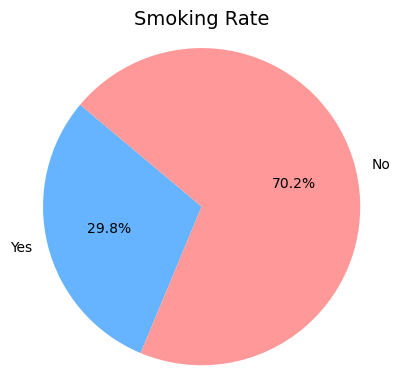

In [31]:
plt.figure(figsize=(4, 4))
plt.pie(
    smoking_rate,
    labels=smoking_rate.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999', '#99ff99'],
    startangle=140,
)

plt.title("Smoking Rate", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [15]:
#Exercise Frequency Analysis (% who exercise daily, weekly, never, etc.).

exercise_frequency = df["Exercise_Freq"].value_counts(normalize=True) * 100
exercise_frequency = exercise_frequency.round(2).sort_values(ascending=True)
print(exercise_frequency)

Exercise_Freq
3-5 times/week    32.50
1-2 times/week    33.25
Daily             34.25
Name: proportion, dtype: float64


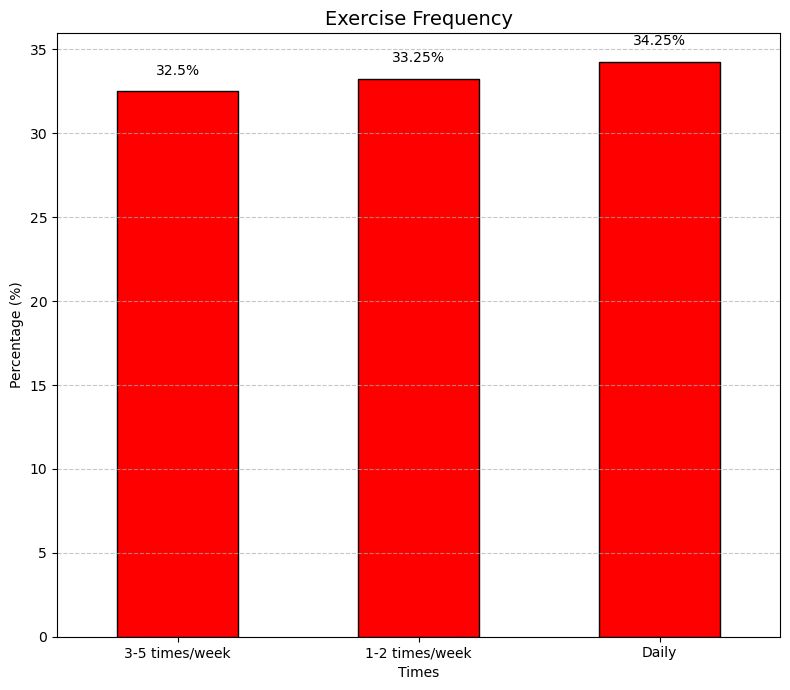

In [33]:
plt.figure(figsize=(8, 7))
exercise_frequency.plot(kind='bar', color='red', edgecolor='black')

plt.title("Exercise Frequency", fontsize=14)
plt.xlabel("Times")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(exercise_frequency):
    plt.text(index, value + 1, f"{value}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
#Diet Quality Breakdown (% Poor, Good, Excellent).

diet_quality = df["Diet_Quality"].value_counts(normalize=True) * 100
diet_quality = diet_quality.round(2).sort_values(ascending=True)
print(diet_quality)

Diet_Quality
Excellent    24.05
Average      25.05
Poor         25.32
Good         25.57
Name: proportion, dtype: float64


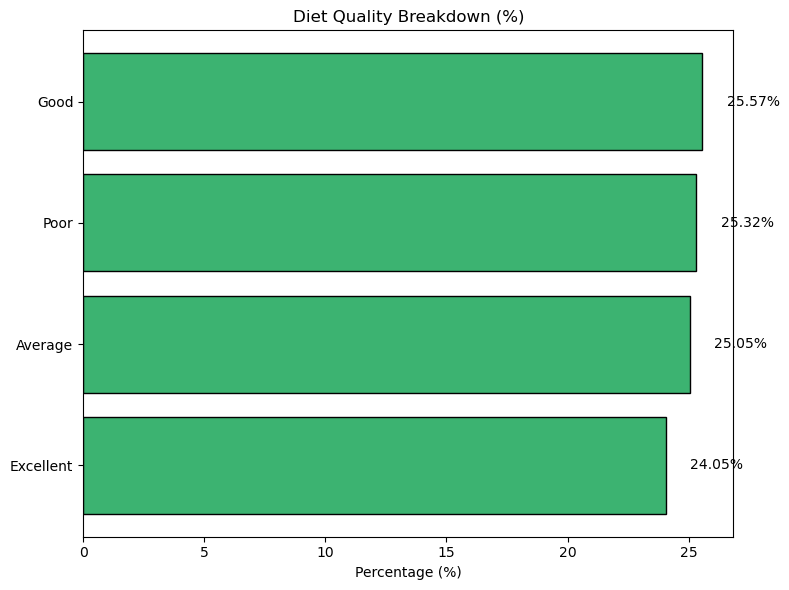

In [40]:
plt.figure(figsize=(8, 6))
plt.barh(diet_quality.index, diet_quality.values, color='mediumseagreen', edgecolor='black')

for index, value in enumerate(diet_quality.values):
    plt.text(value + 1, index, f"{value}%", va='center', fontsize=10)

plt.xlabel("Percentage (%)")
plt.title("Diet Quality Breakdown (%)")
plt.tight_layout()
plt.show()

In [17]:
#Alcohol Consumption Patterns (% None, Low, Moderate, High).

alcohol_consumption = df["Alcohol_Consumption"].value_counts(normalize=True) * 100
alcohol_consumption = alcohol_consumption.round(2).sort_values(ascending=False)
print(alcohol_consumption)

Alcohol_Consumption
Low         33.76
High        33.56
Moderate    32.69
Name: proportion, dtype: float64


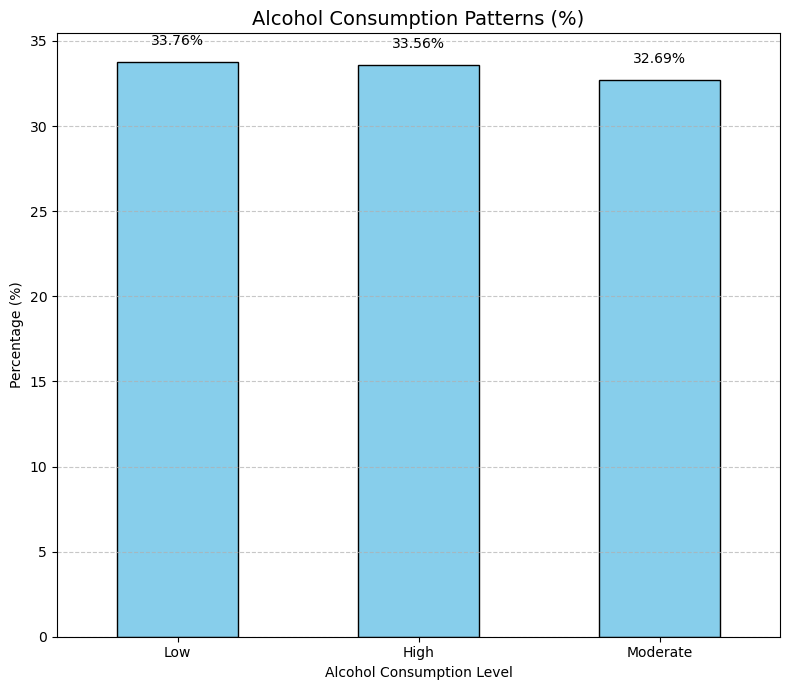

In [24]:
plt.figure(figsize=(8, 7))
alcohol_consumption.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Alcohol Consumption Patterns (%)", fontsize=14)
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(alcohol_consumption):
    plt.text(index, value + 1, f"{value}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()